In [1]:
import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from DatasetHandler  import *

In [2]:
def build_model(n_features, n_classes, num_layers=3):
    model = Sequential()
    
    delta = np.power(n_features / n_classes, 1/num_layers)
    n_2 = np.int(4*n_features / delta)
    n_3 = np.int(3*n_2 / delta)
    model.add(Dense(n_2, input_dim=n_features, activation='relu'))
    model.add(Dense(n_3, activation='relu'))
    model.add(Dense(n_classes, activation='sigmoid'))
    return model

In [4]:
df = pd.read_csv('../datasets/Dataset.csv', index_col=False)
y = df['Label']
x = df.drop(columns=['Unnamed: 0', 'Label'])

In [5]:
df_test = pd.read_csv('../datasets/Test.csv', index_col=False)
y_test = df_test['Label']
x_test = df_test.drop(columns=['Unnamed: 0', 'Label'])

In [6]:
x, y = del_nan(x, y)
x_test, y_test = del_nan(x_test, y_test)

In [7]:
sc = MinMaxScaler()
x = sc.fit_transform(x)
y = y.values
X_big_test = sc.transform(x_test)
Y_big_test = y_test.values

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [9]:
n_features = x.shape[1]
dense_net = build_model(n_features, 1)
dense_net.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','AUC'])

In [10]:
history = dense_net.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=450, batch_size=10000)

Epoch 1/450
18/18 [==============================] - 0s 28ms/step - loss: 0.6786 - accuracy: 0.5960 - auc: 0.6196 - val_loss: 0.6647 - val_accuracy: 0.6506 - val_auc: 0.7955
Epoch 2/450
18/18 [==============================] - 0s 17ms/step - loss: 0.6521 - accuracy: 0.6478 - auc: 0.7903 - val_loss: 0.6389 - val_accuracy: 0.6466 - val_auc: 0.8187
Epoch 3/450
18/18 [==============================] - 0s 18ms/step - loss: 0.6243 - accuracy: 0.6480 - auc: 0.8284 - val_loss: 0.6097 - val_accuracy: 0.6525 - val_auc: 0.8418
Epoch 4/450
18/18 [==============================] - 0s 17ms/step - loss: 0.5937 - accuracy: 0.6577 - auc: 0.8491 - val_loss: 0.5785 - val_accuracy: 0.6707 - val_auc: 0.8567
Epoch 5/450
18/18 [==============================] - 0s 17ms/step - loss: 0.5611 - accuracy: 0.6764 - auc: 0.8679 - val_loss: 0.5446 - val_accuracy: 0.7019 - val_auc: 0.8822
Epoch 6/450
18/18 [==============================] - 0s 18ms/step - loss: 0.5253 - accuracy: 0.7565 - auc: 0.8759 - val_loss: 0.50

Epoch 48/450
18/18 [==============================] - 0s 24ms/step - loss: 0.2017 - accuracy: 0.9091 - auc: 0.9815 - val_loss: 0.2020 - val_accuracy: 0.9081 - val_auc: 0.9820
Epoch 49/450
18/18 [==============================] - 0s 25ms/step - loss: 0.1993 - accuracy: 0.9095 - auc: 0.9818 - val_loss: 0.1999 - val_accuracy: 0.9089 - val_auc: 0.9823
Epoch 50/450
18/18 [==============================] - 0s 20ms/step - loss: 0.1972 - accuracy: 0.9100 - auc: 0.9822 - val_loss: 0.1978 - val_accuracy: 0.9099 - val_auc: 0.9825
Epoch 51/450
18/18 [==============================] - 0s 19ms/step - loss: 0.1952 - accuracy: 0.9105 - auc: 0.9823 - val_loss: 0.1958 - val_accuracy: 0.9117 - val_auc: 0.9827
Epoch 52/450
18/18 [==============================] - 0s 19ms/step - loss: 0.1933 - accuracy: 0.9113 - auc: 0.9824 - val_loss: 0.1934 - val_accuracy: 0.9102 - val_auc: 0.9830
Epoch 53/450
18/18 [==============================] - 0s 18ms/step - loss: 0.1907 - accuracy: 0.9117 - auc: 0.9830 - val_loss

Epoch 95/450
18/18 [==============================] - 0s 18ms/step - loss: 0.1150 - accuracy: 0.9586 - auc: 0.9932 - val_loss: 0.1177 - val_accuracy: 0.9580 - val_auc: 0.9932
Epoch 96/450
18/18 [==============================] - 0s 17ms/step - loss: 0.1138 - accuracy: 0.9586 - auc: 0.9933 - val_loss: 0.1167 - val_accuracy: 0.9576 - val_auc: 0.9931
Epoch 97/450
18/18 [==============================] - 0s 17ms/step - loss: 0.1127 - accuracy: 0.9590 - auc: 0.9934 - val_loss: 0.1158 - val_accuracy: 0.9580 - val_auc: 0.9933
Epoch 98/450
18/18 [==============================] - 0s 16ms/step - loss: 0.1118 - accuracy: 0.9593 - auc: 0.9935 - val_loss: 0.1154 - val_accuracy: 0.9593 - val_auc: 0.9933
Epoch 99/450
18/18 [==============================] - 0s 17ms/step - loss: 0.1111 - accuracy: 0.9598 - auc: 0.9935 - val_loss: 0.1141 - val_accuracy: 0.9587 - val_auc: 0.9934
Epoch 100/450
18/18 [==============================] - 0s 17ms/step - loss: 0.1099 - accuracy: 0.9598 - auc: 0.9937 - val_los

18/18 [==============================] - 0s 16ms/step - loss: 0.0897 - accuracy: 0.9690 - auc: 0.9951 - val_loss: 0.0943 - val_accuracy: 0.9664 - val_auc: 0.9950
Epoch 142/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0894 - accuracy: 0.9691 - auc: 0.9952 - val_loss: 0.0936 - val_accuracy: 0.9665 - val_auc: 0.9949
Epoch 143/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0889 - accuracy: 0.9687 - auc: 0.9952 - val_loss: 0.0932 - val_accuracy: 0.9670 - val_auc: 0.9950
Epoch 144/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0887 - accuracy: 0.9691 - auc: 0.9952 - val_loss: 0.0930 - val_accuracy: 0.9680 - val_auc: 0.9950
Epoch 145/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0885 - accuracy: 0.9694 - auc: 0.9953 - val_loss: 0.0930 - val_accuracy: 0.9703 - val_auc: 0.9950
Epoch 146/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0881 - accuracy: 0.9694 - auc: 0.9952 - val_loss: 0.0925

Epoch 188/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0758 - accuracy: 0.9737 - auc: 0.9963 - val_loss: 0.0803 - val_accuracy: 0.9738 - val_auc: 0.9959
Epoch 189/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0756 - accuracy: 0.9743 - auc: 0.9963 - val_loss: 0.0798 - val_accuracy: 0.9728 - val_auc: 0.9959
Epoch 190/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0754 - accuracy: 0.9743 - auc: 0.9962 - val_loss: 0.0797 - val_accuracy: 0.9731 - val_auc: 0.9959
Epoch 191/450
18/18 [==============================] - 0s 16ms/step - loss: 0.0756 - accuracy: 0.9739 - auc: 0.9962 - val_loss: 0.0804 - val_accuracy: 0.9752 - val_auc: 0.9960
Epoch 192/450
18/18 [==============================] - 0s 16ms/step - loss: 0.0752 - accuracy: 0.9747 - auc: 0.9963 - val_loss: 0.0794 - val_accuracy: 0.9743 - val_auc: 0.9959
Epoch 193/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0749 - accuracy: 0.9748 - auc: 0.9963 - va

18/18 [==============================] - 0s 20ms/step - loss: 0.0657 - accuracy: 0.9798 - auc: 0.9969 - val_loss: 0.0700 - val_accuracy: 0.9763 - val_auc: 0.9966
Epoch 235/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0655 - accuracy: 0.9796 - auc: 0.9969 - val_loss: 0.0696 - val_accuracy: 0.9793 - val_auc: 0.9966
Epoch 236/450
18/18 [==============================] - 0s 18ms/step - loss: 0.0652 - accuracy: 0.9798 - auc: 0.9970 - val_loss: 0.0696 - val_accuracy: 0.9791 - val_auc: 0.9966
Epoch 237/450
18/18 [==============================] - 0s 19ms/step - loss: 0.0653 - accuracy: 0.9791 - auc: 0.9969 - val_loss: 0.0695 - val_accuracy: 0.9775 - val_auc: 0.9966
Epoch 238/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0649 - accuracy: 0.9796 - auc: 0.9970 - val_loss: 0.0689 - val_accuracy: 0.9789 - val_auc: 0.9966
Epoch 239/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0646 - accuracy: 0.9798 - auc: 0.9970 - val_loss: 0.0695

Epoch 281/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0572 - accuracy: 0.9820 - auc: 0.9974 - val_loss: 0.0608 - val_accuracy: 0.9820 - val_auc: 0.9971
Epoch 282/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0567 - accuracy: 0.9829 - auc: 0.9975 - val_loss: 0.0604 - val_accuracy: 0.9812 - val_auc: 0.9972
Epoch 283/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0565 - accuracy: 0.9835 - auc: 0.9975 - val_loss: 0.0603 - val_accuracy: 0.9824 - val_auc: 0.9972
Epoch 284/450
18/18 [==============================] - 0s 18ms/step - loss: 0.0565 - accuracy: 0.9829 - auc: 0.9975 - val_loss: 0.0605 - val_accuracy: 0.9793 - val_auc: 0.9973
Epoch 285/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0562 - accuracy: 0.9832 - auc: 0.9975 - val_loss: 0.0603 - val_accuracy: 0.9815 - val_auc: 0.9972
Epoch 286/450
18/18 [==============================] - 0s 18ms/step - loss: 0.0560 - accuracy: 0.9831 - auc: 0.9975 - va

18/18 [==============================] - 0s 20ms/step - loss: 0.0497 - accuracy: 0.9853 - auc: 0.9979 - val_loss: 0.0524 - val_accuracy: 0.9843 - val_auc: 0.9977
Epoch 328/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0496 - accuracy: 0.9853 - auc: 0.9979 - val_loss: 0.0524 - val_accuracy: 0.9840 - val_auc: 0.9977
Epoch 329/450
18/18 [==============================] - 0s 16ms/step - loss: 0.0498 - accuracy: 0.9843 - auc: 0.9979 - val_loss: 0.0523 - val_accuracy: 0.9844 - val_auc: 0.9977
Epoch 330/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0494 - accuracy: 0.9853 - auc: 0.9979 - val_loss: 0.0520 - val_accuracy: 0.9844 - val_auc: 0.9978
Epoch 331/450
18/18 [==============================] - 0s 18ms/step - loss: 0.0493 - accuracy: 0.9852 - auc: 0.9979 - val_loss: 0.0523 - val_accuracy: 0.9819 - val_auc: 0.9978
Epoch 332/450
18/18 [==============================] - 0s 17ms/step - loss: 0.0493 - accuracy: 0.9849 - auc: 0.9979 - val_loss: 0.0517

Epoch 374/450
18/18 [==============================] - 0s 20ms/step - loss: 0.0459 - accuracy: 0.9850 - auc: 0.9981 - val_loss: 0.0483 - val_accuracy: 0.9847 - val_auc: 0.9980
Epoch 375/450
18/18 [==============================] - 0s 20ms/step - loss: 0.0453 - accuracy: 0.9862 - auc: 0.9982 - val_loss: 0.0480 - val_accuracy: 0.9848 - val_auc: 0.9980
Epoch 376/450
18/18 [==============================] - 0s 20ms/step - loss: 0.0453 - accuracy: 0.9863 - auc: 0.9982 - val_loss: 0.0475 - val_accuracy: 0.9867 - val_auc: 0.9980
Epoch 377/450
18/18 [==============================] - 0s 22ms/step - loss: 0.0451 - accuracy: 0.9864 - auc: 0.9982 - val_loss: 0.0476 - val_accuracy: 0.9858 - val_auc: 0.9980
Epoch 378/450
18/18 [==============================] - 0s 20ms/step - loss: 0.0450 - accuracy: 0.9864 - auc: 0.9982 - val_loss: 0.0476 - val_accuracy: 0.9859 - val_auc: 0.9980
Epoch 379/450
18/18 [==============================] - 0s 20ms/step - loss: 0.0451 - accuracy: 0.9861 - auc: 0.9982 - va

18/18 [==============================] - 0s 21ms/step - loss: 0.0426 - accuracy: 0.9860 - auc: 0.9984 - val_loss: 0.0464 - val_accuracy: 0.9839 - val_auc: 0.9979
Epoch 421/450
18/18 [==============================] - 0s 21ms/step - loss: 0.0425 - accuracy: 0.9861 - auc: 0.9984 - val_loss: 0.0452 - val_accuracy: 0.9847 - val_auc: 0.9981
Epoch 422/450
18/18 [==============================] - 0s 21ms/step - loss: 0.0423 - accuracy: 0.9860 - auc: 0.9984 - val_loss: 0.0444 - val_accuracy: 0.9868 - val_auc: 0.9981
Epoch 423/450
18/18 [==============================] - 0s 21ms/step - loss: 0.0419 - accuracy: 0.9868 - auc: 0.9984 - val_loss: 0.0443 - val_accuracy: 0.9869 - val_auc: 0.9982
Epoch 424/450
18/18 [==============================] - 0s 20ms/step - loss: 0.0419 - accuracy: 0.9868 - auc: 0.9984 - val_loss: 0.0450 - val_accuracy: 0.9851 - val_auc: 0.9981
Epoch 425/450
18/18 [==============================] - 0s 21ms/step - loss: 0.0419 - accuracy: 0.9868 - auc: 0.9984 - val_loss: 0.0446

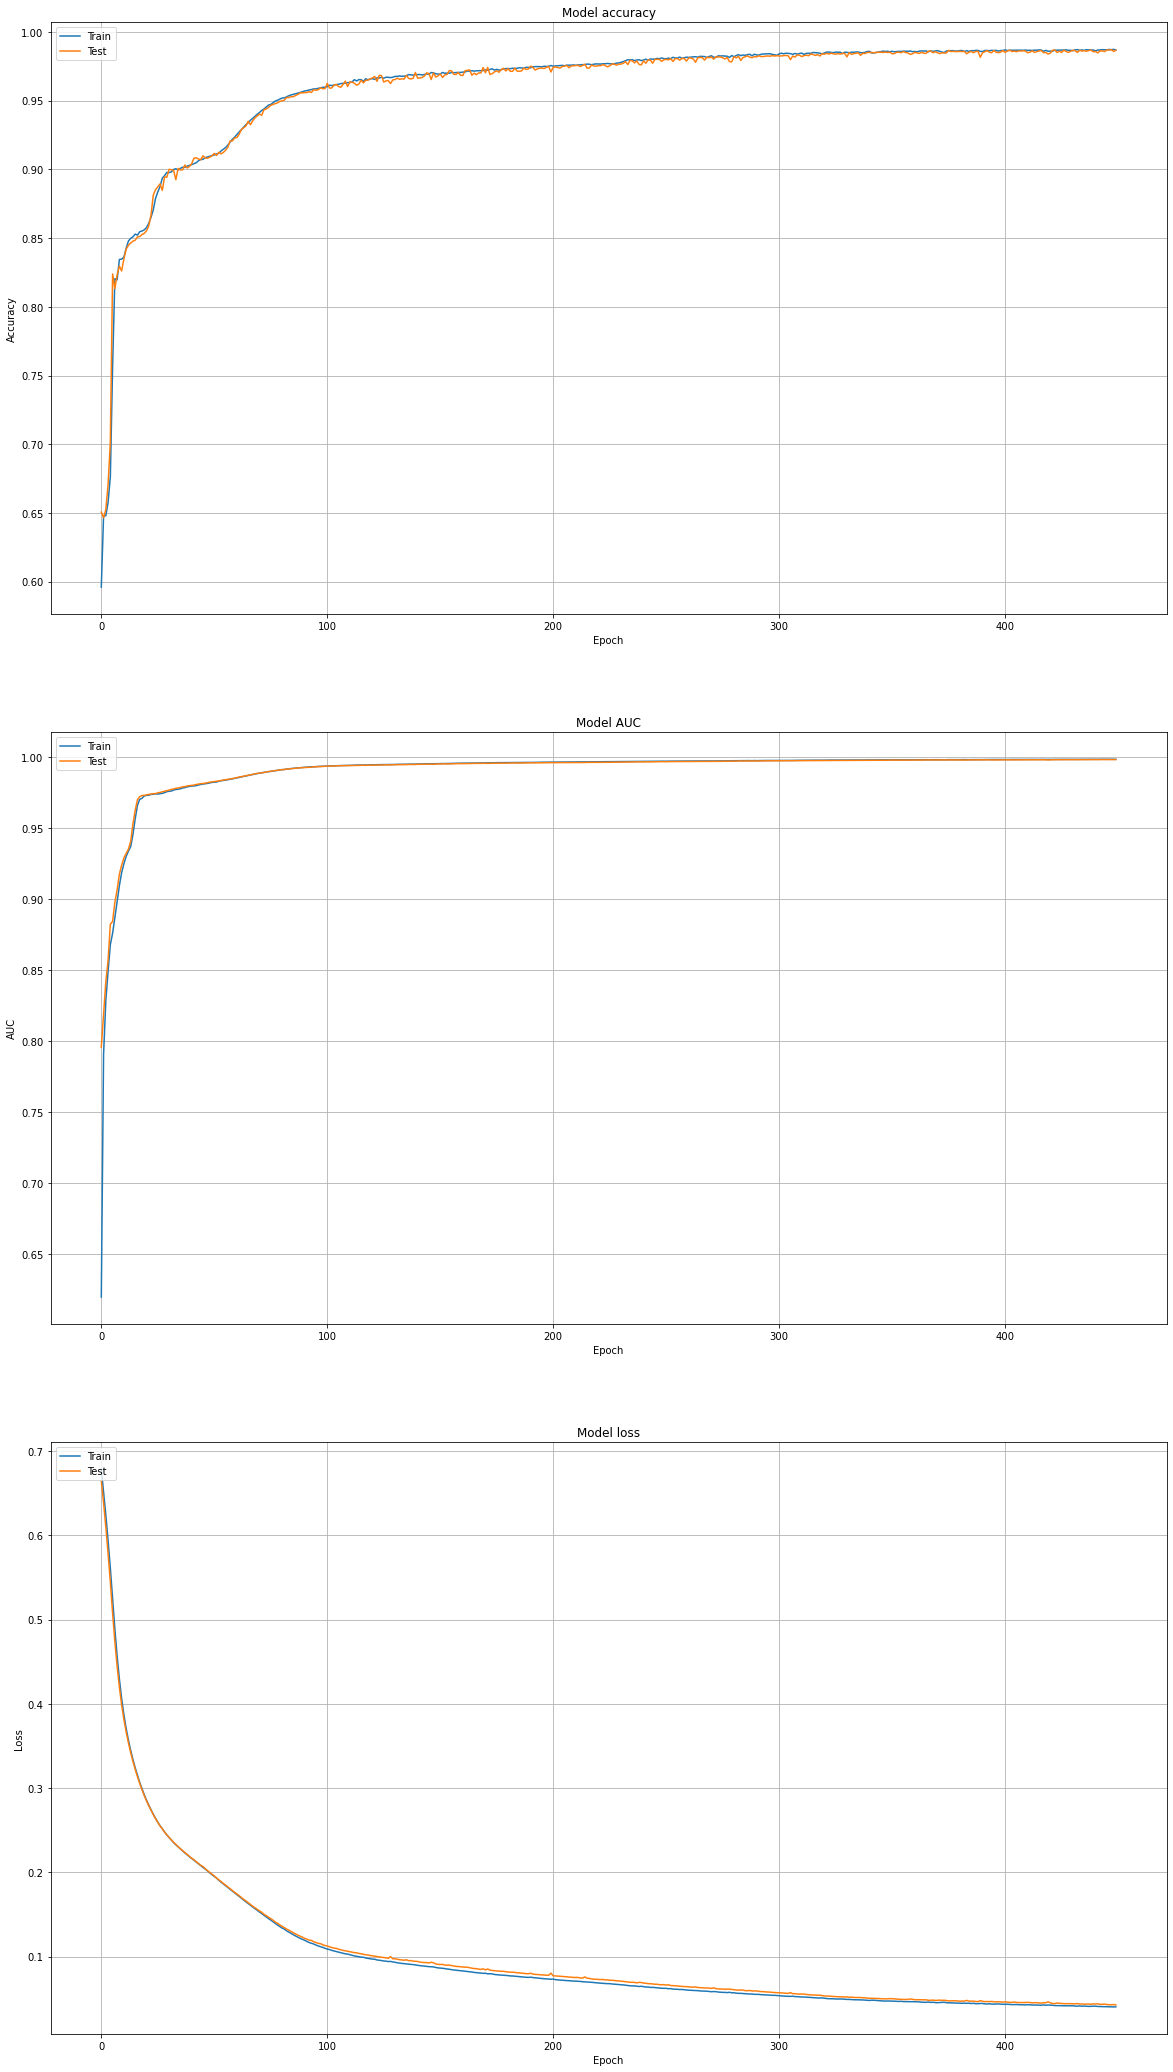

In [11]:
show_nn_metrics(history)

Метрики для большой тестовой выборки

In [12]:
dense_net.evaluate(X_big_test, Y_big_test)

12452/12452 [==============================] - 5s 421us/step - loss: 0.0423 - accuracy: 0.9875 - auc: 0.9984


[0.04233218729496002, 0.9874516129493713, 0.9984106421470642]

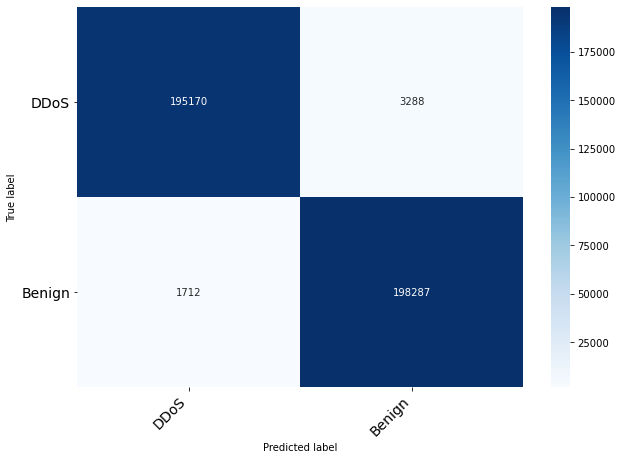

In [13]:
from sklearn.metrics import confusion_matrix
cf_lgb = confusion_matrix(Y_big_test, dense_net.predict(X_big_test).round(0))
fig2 = print_confusion_matrix(cf_lgb,["DDoS","Benign"])

In [14]:
dense_net.save('Saving/keras_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Saving/keras_model/assets


In [15]:
mod = keras.models.load_model('Saving/keras_model')

In [16]:
mod.evaluate(X_big_test, Y_big_test)

12452/12452 [==============================] - 5s 423us/step - loss: 0.0423 - accuracy: 0.9875 - auc: 0.9984


[0.04233218729496002, 0.9874516129493713, 0.9984106421470642]

In [24]:
dense_net.predict_classes(X_big_test)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [23]:
dense_net.predict(X_big_test).round(0)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)